In [19]:
import sys
sys.path.append("/home/wanxinli/OTTEHR/")

import matplotlib.pyplot as plt
from mimic_common import *
import os
import pandas as pd
from statistics import median, stdev

In [20]:

def ratios_for_metrics(group_name, group_2, group_1, eval_metric, trans_metrics):
    """ 
    Compute ratios for the evaluation metrics (eval_metric)

    :param str eval_metric: evaluation metric, mae or rmse
    :param str trans_metric: transporting metric, OT, TCA or MMD
    """

    metric_improve_ratios = []
    score_dir = mimic_output_dir
    for trans_metric in trans_metrics:
        score_path = os.path.join(score_dir, f"exp4_{group_name}_{group_2}2{group_1}_{trans_metric}.csv")
        score_df = pd.read_csv(score_path, header=0, index_col=0)

        # compute improvements in terms of ratio
        metric_improve_ratios.append(compute_metric_ratio(score_df, eval_metric))

    return metric_improve_ratios


In [21]:

def stats_for_metrics(group_name, group_2, group_1, eval_metric, trans_metrics, filter_na = True):
    """ 
    Compute ratios for the evaluation metrics (eval_metric)

    :param str eval_metric: evaluation metric, mae or rmse
    :param str trans_metric: transporting metric, OT or DeepJDOT
    """

    metric_stats = []
    score_dir = mimic_output_dir
    for trans_metric in trans_metrics:
        score_path = os.path.join(score_dir, f"exp4_{group_name}_{group_2}2{group_1}_{trans_metric}.csv")

        score_df = pd.read_csv(score_path, header=0, index_col=None)

        # get target metric
        metric_stats.append(get_target_stats(score_df, eval_metric, trans_metric, filter_na))

    return metric_stats

In [22]:
def print_median_std(ratios, trans_metrics, eval_metric):
    """ 
    Get median and standard deviation for the ratios of trans_metrics ('OT', 'TCA', 'MMD')
    """
    for i, trans_metric in enumerate(trans_metrics):
        print(f'{eval_metric} for {trans_metric}, Median: {median(ratios[i]):.1%}, Stdev: {stdev(ratios[i]):.1%}')

In [23]:
score_dir = "/home/wanxinli/OTTEHR/outputs/mimic/"

eval_metric = 'MAE'
# eval_metric = 'RMSE'

# group_name = 'insurance'
# groups = ['Self_Pay', 'Private', 'Government', 'Medicare', 'Medicaid']

group_name = 'marital_status'
groups = ['SEPARATED', 'DIVORCED', 'MARRIED','WIDOWED', 'SINGLE']

trans_metrics = ['OT', 'TCA', 'CA', 'GFK']



medians for each method is: [ 0.22708073  0.0039536  -0.0501554  -0.27783217]


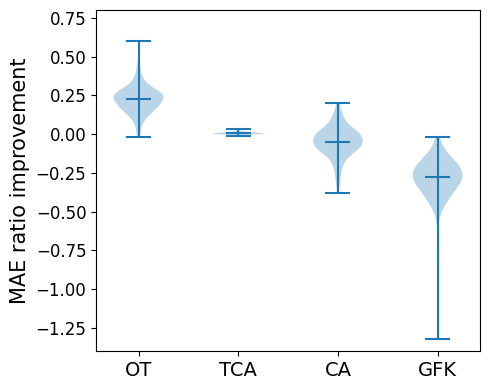

In [24]:
# Overall, for all groups
improve_ratio_combined = []

for group_1 in groups:
    for group_2 in groups:
        if group_1 == group_2:
            continue        
        improve_ratios = ratios_for_metrics(group_name, group_1, group_2, eval_metric, trans_metrics)
        improve_ratio_combined.extend(improve_ratios)

trans_metric_dict = {}
for i in range(len(trans_metrics)):
    trans_metric_dict[trans_metrics[i]] = improve_ratio_combined[i]
# print(np.median(trans_metric_dict['GWOT']))
data = pd.DataFrame(trans_metric_dict)
print("medians for each method is:", np.median(data, axis=0))


# Plot the dataframe
plt.figure(figsize=[5, 4])
plt.violinplot(data, showmedians=True)
plt.xticks(range(1, len(trans_metrics)+1), labels=trans_metrics)
plt.ylabel(f"{eval_metric} ratio improvement", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax = plt.gca()
ax.set_xticklabels( labels=trans_metrics, fontsize=14)
plt.ylim(-1.4, 0.8)
fig_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_{eval_metric}_ratio.pdf")
plt.tight_layout()
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

In [25]:
def print_latex(source, target, ratios):
    """ 
    Print latex for ratios
    """

    print_str = f"{source} & {target}"
    for ratio in ratios:
        print_str += f' & {median(ratio)*100:.1f}({stdev(ratio)*100:.1f})'
    print(print_str)
    

In [26]:
for i, group_1 in enumerate(groups):
    for j, group_2 in enumerate(groups):
        if i <= j:
            continue
        # print(f"group 1: {group_1}, group_2: {group_2}")
        # mae_improve_ratios = ratios_for_metrics(group_name, group_1, group_2, 'mae', trans_metrics)
        # print_median_std(mae_improve_ratios, trans_metrics, 'MAE')
        improve_ratios = ratios_for_metrics(group_name, group_1, group_2, eval_metric, trans_metrics)
        # print(rmse_improve_ratios)
        # print_median_std(rmse_improve_ratios, trans_metrics, eval_metric)
        print_latex(group_1, group_2, improve_ratios)

DIVORCED & SEPARATED & 32.2(10.1) & 0.9(1.1) & -5.3(11.4) & -46.7(16.4)
MARRIED & SEPARATED & 32.3(10.0) & 0.4(1.1) & -4.8(11.5) & -45.7(17.7)
MARRIED & DIVORCED & 25.0(12.1) & 0.5(0.9) & -6.9(12.3) & -29.7(24.9)
WIDOWED & SEPARATED & 37.4(10.4) & 0.6(0.9) & -0.6(10.8) & -61.5(20.2)
WIDOWED & DIVORCED & 30.5(11.9) & 0.5(0.9) & -2.8(11.6) & -40.0(27.6)
WIDOWED & MARRIED & 32.5(8.5) & 0.6(1.1) & -3.4(10.8) & -42.7(17.7)
SINGLE & SEPARATED & 28.9(9.8) & 0.6(0.9) & -4.7(11.2) & -40.9(17.1)
SINGLE & DIVORCED & 20.3(11.9) & 0.6(1.3) & -2.3(10.4) & -26.8(23.7)
SINGLE & MARRIED & 22.9(9.5) & 0.4(1.0) & -4.1(10.4) & -30.1(15.1)
SINGLE & WIDOWED & 19.1(9.1) & 0.4(1.0) & -3.7(9.2) & -23.0(17.6)


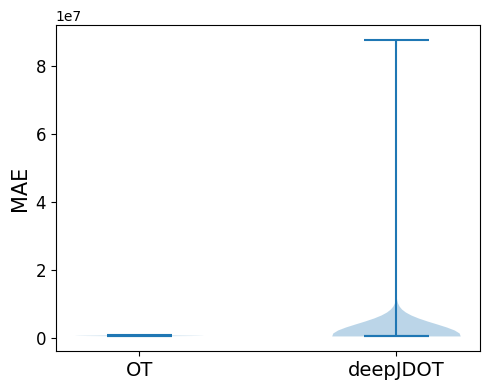

In [27]:
# Present the overall performance for deepJDOT and OTTEHR
trans_metrics = ['OT', 'deepJDOT']
stats_combined = []

for group_1 in groups:
    for group_2 in groups:
        if group_1 == group_2:
            continue        
        stats = stats_for_metrics(group_name, group_1, group_2, eval_metric, trans_metrics, filter_na=True)
        stats_combined.extend(stats)

# fig_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_deepJDOT.pdf")

# plt.tight_layout()
# plt.savefig(fig_path, bbox_inches='tight')
# plt.show()


# Plot the dataframe
plt.figure(figsize=[5, 4])
plt.violinplot([stats_combined[0], stats_combined[1]], showmedians=True)
plt.xticks(range(1, len(trans_metrics)+1), labels=trans_metrics)
plt.ylabel(f"{eval_metric}", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax = plt.gca()
ax.set_xticklabels( labels=trans_metrics, fontsize=14)
# plt.ylim(-1.4, 0.8)
fig_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_{eval_metric}_deepJDOT.pdf")
plt.tight_layout()
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

In [28]:
# Calculate the pairwise performance for deepJDOT and OTTEHR


for i, group_1 in enumerate(groups):
    for j, group_2 in enumerate(groups):
        if i <= j:
            continue
        stats = stats_for_metrics(group_name, group_1, group_2, eval_metric, trans_metrics, filter_na=True)

        print_latex(group_1, group_2, stats)

DIVORCED & SEPARATED & 60096832.7(7996602.7) & 60014506.0(8108405.8)
MARRIED & SEPARATED & 60083152.5(7687256.0) & 59852140.0(142259573.7)
MARRIED & DIVORCED & 58333917.9(7388113.8) & 56002780.0(63789061.4)
WIDOWED & SEPARATED & 55359548.8(7418807.2) & 54334040.0(6472669.7)
WIDOWED & DIVORCED & 52514600.9(7863664.8) & 51474688.0(47183607262.3)
WIDOWED & MARRIED & 50843741.0(5203909.9) & 49730970.0(44317014404.4)
SINGLE & SEPARATED & 63232485.9(8231140.3) & 65346720.0(7994022.5)
SINGLE & DIVORCED & 63023479.2(8541216.2) & 61744910.0(41836785050.2)
SINGLE & MARRIED & 62402203.1(10606358.6) & 63809570.0(20256879352.1)
SINGLE & WIDOWED & 59121469.1(7314179.9) & 60278188.0(28882097101.7)
